In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

In [8]:
system_size = [4, 8, 16, 32, 64, 128, 256]
sites = [4, 6, 8, 10, 12, 14, 16]
sites_s2 = [6, 8, 10, 12, 14, 16, 18]
bond_dim = [4, 8, 14, 18, 20, 19, 24]
bond_dim_s2 = [3, 11, 14, 18, 22, 24, 27]

sites_hf = [4, 8, 12]
system_size_hf = [4, 16, 64, 256]
bond_dim_hf = [4, 22, 131, 834]


In [9]:
def linear_f(x, a, b):
    return a * x + b

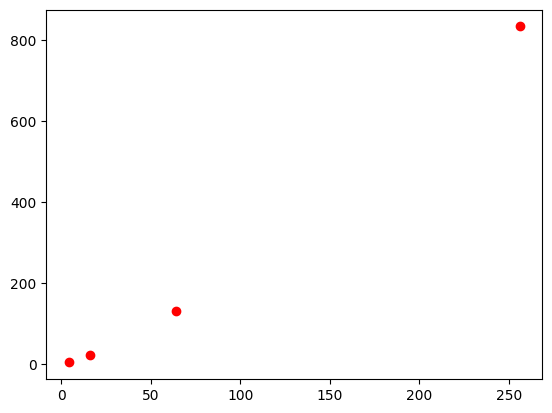

In [10]:
plt.plot(system_size_hf, bond_dim_hf, 'ro')
plt.show()

In [11]:
popt, pcov = curve_fit(linear_f, system_size_hf, bond_dim_hf)
print(popt)
print(pcov)

[  3.36603746 -38.36318408]
[[ 3.79584145e-02 -3.22646520e+00]
 [-3.22646520e+00  6.63361272e+02]]


In [12]:
def chi_square(x_data, y_data):
    total = 0
    for i in range(len(x_data)):
        fit = linear_f(x_data[i], popt[0], popt[1])
        total += (y_data[i] - fit) ** 2 / fit
    
    return total

In [14]:
chi_square(system_size_hf, bond_dim_hf)

-18.687779796498074

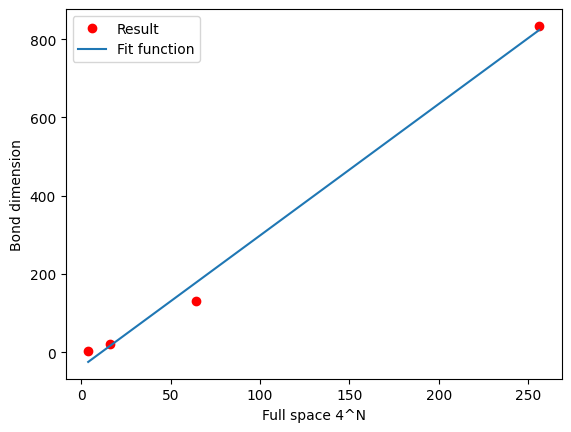

In [16]:
plt.plot(system_size_hf, bond_dim_hf, 'ro', label='Result')
plt.plot(system_size_hf, linear_f(np.array(system_size_hf), popt[0], popt[1]), label='Fit function')
plt.xlabel('Full space 4^N')
plt.ylabel('Bond dimension')
plt.legend()
plt.show()